In [49]:
%matplotlib inline
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import collections
from collections import defaultdict
import seaborn as sns
import itertools
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
#from sklearn import *

In [50]:
#data with hla's and cdr
#cdr A2,B1,A28.... (from multiple samples)
data = pd.read_csv('tmp7.txt', sep="\t")

data_a = data[['cdr', 'hla']]
data_a.columns = ['a', 'hla_a']
data_b = data[['cdr', 'hla']]
data_b.columns = ['b', 'hla_b']

#graph pairs
#file with edges after multiple testing cut
pairs = pd.read_csv("new_pvals_adjust_0_1.txt", sep="\t")
pairs2 = pairs[['a', 'b']]

#list of all cdrs in graph
c = list(set(pairs2['b'].tolist() + pairs2['a'].tolist()))

tmp = pairs2.merge(data_a, on='a', how='inner').merge(data_b, on='b', how='inner')
tmp.to_csv("EDGES_HLA.txt", sep="\t", index=False)

#make shuffle pairs
import itertools
import random
shuff = random.sample(list(itertools.combinations(c, 2)), 466356)

df = pd.DataFrame(shuff, columns=['a', 'b'])
df2 = df.merge(data_a, on='a', how='inner').merge(data_b, on='b', how='inner')
df2.to_csv("SHUFFLED_HLA.txt", sep="\t", index=False)

# HIST: HLA intersection berween pairs in graph

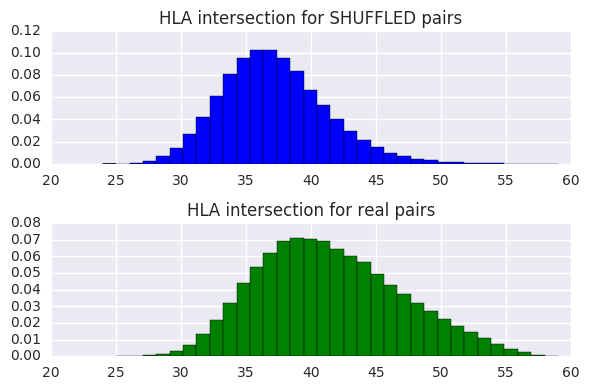

In [52]:
pen = {}
with open("EDGES_HLA.txt", 'r') as f:
    for line in f.readlines():
        if line.find("hla") == -1:
            l = line.split("\t")
            key = (l[0], l[1])
            sp1 = l[2].split(",")
            sp2 = l[3].split(",")
            inters = set(sp1).intersection(sp2)        
            pen[key] = len(inters)    
            
pen1 = {}
with open("SHUFFLED_HLA.txt", 'r') as f:
    for line in f.readlines():
        l = line.split("\t")
        if line.find("hla") == -1:
            key = (l[0], l[1])
            sp1 = l[2].split(",")
            sp2 = l[3].split(",")
            inters = set(sp1).intersection(sp2)        
            pen1[key] = len(inters) 
            
HLA_intertsect1 = []
for k, v in pen1.items():
    HLA_intertsect1.append(v)
    
HLA_intertsect = []
for k, v in pen.items():
    HLA_intertsect.append(v)
    
fig = plt.figure()

ax1 = fig.add_subplot(211)
plt.hist(HLA_intertsect1, normed=True, bins=34, color='blue')
plt.title("HLA intersection for SHUFFLED pairs")

ax2 = fig.add_subplot(212)
plt.hist(HLA_intertsect, normed=True, bins=34, color='green')
plt.title("HLA intersection for real pairs")

fig.tight_layout()
plt.show()

# KOLMOGOROV-SMIRNOV

In [48]:
from scipy.stats import ks_2samp
ks_2samp(HLA_intertsect, HLA_intertsect1)
#pvalue=0.0

Ks_2sampResult(statistic=0.34484385319369754, pvalue=0.0)